# Deep Learning CNN Architecture (VGGnet)
Convolutional Neural Network merupakan deep learning yang kini sering dipakai dalam berbagai aplikasi, salah satunya adalah image classification. Pada notebook ini, pembahasan akan berfokus pada Arsitektur VGGnet.


Sebelum memulai, alangkah baiknya bila kita melakukan import package yang dibutuhkan dalam membuat arsitektur tersebut

#### Bila menggunakan google collab, import code tersebut

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Package yang dibutuhkan
Pada pengimplementasian, berikut ini adalah package yang dibutuhkan. Untuk membangun arsitektur CNN, package yang sering dipakai adalah Keras. 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Deskripsi Dataset
Berikut ini adalah dataset yang digunakan. Sama seperti assingment 3 kemarin, dataset yang digunakan adalah Fruit Dataset. Dataset tersebut terdiri dari 7 kelas, yaitu apple, banana, lemon, lime, orange, pear, peach.

In [0]:
X_path = 'gdrive/My Drive/Sisrek/Assignment 4/Datasets/X.npy'
X_pathgambarasli = 'gdrive/My Drive/Sisrek/Assignment 4/Datasets/X_gambar.npy'
y_path = 'gdrive/My Drive/Sisrek/Assignment 4/Datasets/y.npy'

X = np.load(X_path)
X_asli = np.load(X_pathgambarasli)
y = np.load(y_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

Pembagian dataset terdiri dari 67% data training dan 33% data testing. Berikut ini adalah jumlah dari masing-masing data

In [0]:
print("Jumlah Data Training : ",np.shape(X_train)[0])
print("Jumlah Data Testing : ",np.shape(X_test)[0])

Jumlah Data Training :  14262
Jumlah Data Testing :  7025


### Deskripsi Arsitektur
Arsitektur deep learning yang digunakan adalah VGGNet. Rujukan dari sistem yang dibangun berasal dari paper *Very Deep Convolutional Networks for Large-Scale Image Recognition* yang ditulis oleh Karen Simonyan dan Andrew Zisserman. Berikut ini adalah configurasi arsitektur yang dijelaskan pada paper tersebut

<img src="tabel.png" width=400px>

Pada assignment 4 ini, penulis memilih network bagian A, yaitu terdapat 11 layer yang terdiri dari 8 layer konvolusi dan 3 layer fully connected.

### Deskripsi Sistem

<img src="Block Diagram Assignment 4.png" width=400px>

Menurut paper tersebut, untuk menginputkan gambar membutuhkan gambar sebesar 224x224x3 (RGB), namun pada kasus ini akan dicoba input gambar sebesar 224x224x1 (Grayscale). Deep learning ini sendiri memiliki 2 tahap, yaitu Feature Learning dengan Classification. Feature learning merupakan tahap dimana sistem akan melakukan pembelajaran pada fitur, bila dengan menggunakan machine learning biasa manusia yang menentukan fitur yang ingin dipelajari, maka bila menggunakan deep learning sistem akan otomatis mempelajari fitur yang akan diekstraksi. 

Feature learning memiliki 2 jenis layer, yaitu Convolution Layer dan Pooling Layer. Fungsi aktivasi yang digunakan adalah RELU. Convolution Layer merupakan layer yang digunakan untuk memproses fitur. Sedangkan Pooling Layer digunakan untuk mereduksi dimensi dari hasil konvolusi yang tadi sehingga hemat waktu proses komputasi. Pada sistem ini, kernel konvolusi yang digunakan berukuran 3x3, Jumlah filter yang digunakan adalah 64,128,256, dan 512. Pada block diagram tersebut, hal tersebut direpresentasikan dengan conv(size filter)-(jumlah filter). Untuk pooling layernya sendiri adalah sebesar 2x2.

Pada Classification, layer yang digunakan adalah Fully Connected Layer. Sebelum masuk pada layer tersebut, hasil konvolusi tersebut harus di flatten agar menjadi vector 1 dimensi. Pada sistem tersebut, dimensi output yang dihasilkan adalah 4096 dan 1000. Untuk fungsi aktivasinya sendiri menggunakan RELU dan untuk output layernya sendiri menggunakan Softmax. 

### Pembangunan Model
Berikut ini merupakan model yang dibangun, diantaranya adalah sebagai berikut

#### Model VGGnet

In [0]:
model = Sequential()

model.add(Conv2D(64,3,activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(256,3,activation='relu'))
model.add(Conv2D(256,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(512,3,activation='relu'))
model.add(Conv2D(512,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(512,3,activation='relu'))
model.add(Conv2D(512,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(7,activation='softmax',name='predictions'))

#### Perhitungan Loss
Perhitungan Loss yang digunakan adalah categorical_crossentropy, sedangkan optimizer yang digunakan adalah optimizer Adam.

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Proses Latih

In [0]:
model.fit(X_train,y_train,batch_size=128,epochs=50,validation_split=0.33)

Train on 9555 samples, validate on 4707 samples
Epoch 1/50
9555/9555 [==============================] - 161s 17ms/step - loss: 2.5833 - acc: 0.4045 - val_loss: 3.7768 - val_acc: 0.4636
Epoch 2/50
9555/9555 [==============================] - 131s 14ms/step - loss: 1.0715 - acc: 0.6599 - val_loss: 7.4559 - val_acc: 0.3792
Epoch 3/50
9555/9555 [==============================] - 131s 14ms/step - loss: 0.6089 - acc: 0.8022 - val_loss: 4.4928 - val_acc: 0.4563
Epoch 4/50
9555/9555 [==============================] - 131s 14ms/step - loss: 0.4437 - acc: 0.8698 - val_loss: 13.5708 - val_acc: 0.1508
Epoch 5/50
9555/9555 [==============================] - 131s 14ms/step - loss: 0.3511 - acc: 0.8994 - val_loss: 1.7525 - val_acc: 0.7009
Epoch 6/50
9555/9555 [==============================] - 131s 14ms/step - loss: 0.1706 - acc: 0.9475 - val_loss: 0.8266 - val_acc: 0.7621
Epoch 7/50
9555/9555 [==============================] - 131s 14ms/step - loss: 0.1167 - acc: 0.9602 - val_loss: 0.9424 - val_acc:

#### Evaluasi Model

In [0]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.14814414688604768
Test Accuracy: 0.9648398576512456


### Contoh Hasil Pengenalan

In [0]:
#mengambil gambar asli
X_TraingbrAsli, X_TestgbrAsli, y_trainasli, y_testasli = train_test_split(X_asli, y, test_size=0.33,shuffle=False)

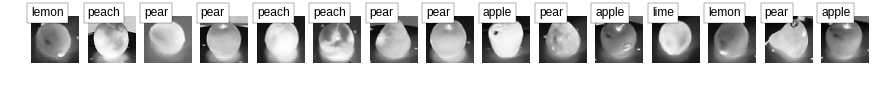

In [0]:
#menampilkan gambar asli
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)
plt.figure(figsize=(15,8))
for i in range(slice):
  if predicted[i]==0:
    prd="apple"
  elif predicted[i]==1:
    prd="banana"
  elif predicted[i]==2:
    prd="lemon"
  elif predicted[i]==3:
    prd="lime"
  elif predicted[i]==4:
    prd="orange"
  elif predicted[i]==5:
    prd="peach"
  elif predicted[i]==6:
    prd="pear"
  plt.subplot(1, slice, i+1)
  plt.imshow(X_TestgbrAsli[i], interpolation='nearest')
  plt.text(0, 0, prd, color='black', 
           bbox=dict(facecolor='white', alpha=1))
  plt.axis('off')

### Analisis dengan Assignment 3
Pada assignment 3, akurasi 99% dihasilkan oleh deksriptor bentuk. Dan pada model VGGnet tersebut, hasil yang dihasilkan adalah 99% juga dengan loss yang kecil, yaitu 0.0044. Hal tersebut menunjukkan bahwa deskriptor bentuk dan model VGGnet sama-sama menghasilkan hasil yang bagus. Namun, mungkin data yang diperlukan harus lebih beragam agar tidak terjadi overfitting.